In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install python-docx

#import libraries
import pandas as pd
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
# Download NLTK stop words data
import nltk
nltk.download('stopwords')
from docx import Document

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 5.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#FUCTIONS
#FUNCTION TO TAKE A FILE PATH THAT HAS A LIST OF WORDS WHERE EACH WORD IS ON ITS OWN LINE ALONE AND RETURN A REGULAR LIST OF THESE WORDS
def docx_to_list(input_path):
  # Create an empty list to store the words
  words = []

  # Load the Word document
  doc = Document(input_path)

  # Iterate through paragraphs and extract text
  for paragraph in doc.paragraphs:
      words.append(paragraph.text)

  return words

#GET STATS BY WORD LIST
def stats_by_word_list(word_list,blank):
  #note 'blank' is a place holder for the name of the type of words in the word list for exapmle 'profane' or 'religious'
  years = list(range(DATA_START_YEAR, DATA_END_YEAR+1))# Generate years from 1946 to 2022

  total_words = []
  num_blank_words = []
  num_unique_blank_words = []


  for i in range(DATA_START_YEAR,DATA_END_YEAR+1):


    word_counts = lyrics_df.loc[(lyrics_df['Hot100 Ranking Year'] == i) & lyrics_df['Lyrics'].notna(), 'Lyrics'].apply(lambda x: len(x) if x is not None else 0)
    total_words.append(word_counts.sum())


    blank_words_in_lyrics = []
    for index, row in lyrics_df[lyrics_df['Hot100 Ranking Year']== i].iterrows():
      #print(index)
      lyrics_list = row['Lyrics']
      if isinstance(lyrics_list, list):
        for word in lyrics_list:
          if word.lower() in word_list:
            blank_words_in_lyrics.append(word.lower())

    blank_words_in_lyrics_unique = list(set(blank_words_in_lyrics))

    num_blank_words.append(len(blank_words_in_lyrics))
    num_unique_blank_words.append(len(blank_words_in_lyrics_unique))



  data = {
      'year': years,
      'total_words': total_words,
      f'num_{blank}_words': num_blank_words,  # Replace with your actual data
      f'num_unique_{blank}_words': num_unique_blank_words  # Replace with your actual data

  }

  # Create a DataFrame
  df = pd.DataFrame(data)

  #Calculate the blank word rate
  df[f'{blank}_word_rate'] = df[f'num_{blank}_words'] / df['total_words']
  return df

#FUNCTIONS TO COLLECT THE INFORMATION TO MAKE THE FINAL PLOT OF THE DIFFERENT TOP WORDS VS YEAR

#returns a list of dictionaries one for each year with the counts of each word in the list used
def get_list_of_word_counts_by_year(word_list):
  words_by_year = {}


  for i in range(DATA_START_YEAR,DATA_END_YEAR+1,1):
    sub_df=lyrics_df[lyrics_df['Hot100 Ranking Year']==i]
    blank_words_in_lyrics = []

    for index, row in sub_df.iterrows():
      #print(index)
      lyrics_list = row['Lyrics']
      if isinstance(lyrics_list, list):
        for word in lyrics_list:
          if word.lower() in word_list:
            blank_words_in_lyrics.append(word.lower())


    # Use Counter to count occurrences of each word
    word_count_dict = Counter(blank_words_in_lyrics)

    # Convert the Counter object to a dictionary
    word_count_dict = dict(word_count_dict)

    # Print the resulting dictionary
    sorted_word_count = dict(sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True))

    words_by_year[i]= sorted_word_count
  return words_by_year


  #change the list of dicts to a list of lists
def list_of_dicts_to_list_of_lists(list_of_dicts):
  list_of_lists = []

  for year, word_count_dict in list_of_dicts.items():
      # Convert the word count dictionary into a list of tuples
      word_count_list = list(word_count_dict.items())

      # Sort the list of tuples by count in descending order
      sorted_word_count_list = sorted(word_count_list, key=lambda item: item[1], reverse=True)

      # Append the sorted word count list to the final list
      list_of_lists.append(sorted_word_count_list)
  return list_of_lists

#make a table with year in row and all the list words as columns then put in the count for each word
def get_table_with_years_and_word_count_for_each_list_word(dict_of_dicts, word_list):
    df = pd.DataFrame(index=range(DATA_START_YEAR, DATA_END_YEAR+1), columns=word_list)

    # Fill in the DataFrame with values from your dictionary and replace NaN with 0
    for year, data in dict_of_dicts.items():
        for key, value in data.items():
            df.at[year, key] = value

    # Fill NaN cells with 0
    df = df.fillna(0)

    # Display the resulting DataFrame
    return df

#get a dataframe with the rates of each word
def get_rates_dataframe(word_counts_df,general_df_with_total_words_col):
  rate_df = word_counts_df.copy()

  for i in range(len(df_gen)):
    divider = general_df_with_total_words_col.loc[:,'total_words'][i]
    rate_df.iloc[i,:] = rate_df.iloc[i,:]/divider

  return rate_df


#FUNCTIONS TO MAKE GRAPHS

#plot year vs rate of the type of word like year vs the rate of profane words for example
def year_vs_word_type_rate(df,blank):
  # Assuming df is your DataFrame
  sns.regplot(x='year', y=f'{blank}_word_rate', data=df, order=2)  # Set order to the desired polynomial order

  # Optionally, you can add labels and a title
  plt.xlabel('year')
  plt.ylabel(f'{blank}_word_rate')
  plt.title(f'year vs {blank} word rate')

  # Show the plot
  plt.show()

#plot the year vs number of unique word for a type of word like profane or religious
def year_vs_unique_words_of_type(df, blank, graph_color='black', dot_color='coral'):
    # Assuming df is your DataFrame
    sns.scatterplot(x='year', y=f'num_unique_{blank}_words', data=df, color=dot_color)

    # Optionally, you can add labels and a title
    plt.xlabel('Year')
    plt.ylabel(f'Number of unique {blank} words')
    plt.title(f'Year vs Number of Unique {blank} Words')

    # Change the color of the graph
    plt.gca().spines['bottom'].set_color(graph_color)  # Change color of the x-axis
    plt.gca().spines['left'].set_color(graph_color)    # Change color of the y-axis
    plt.gca().tick_params(axis='x', colors=graph_color)  # Change color of x-axis ticks
    plt.gca().tick_params(axis='y', colors=graph_color)  # Change color of y-axis ticks

    # Show the plot
    plt.show()

def make_plot(word_counts_df, rates_df, top_x=10):
    column_sums = word_counts_df.sum()
    top_x_words = column_sums.sort_values(ascending=False).head(top_x)

    # Set up the plot using Seaborn
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 8))

    # Specify a more distinguishable color palette
    palette = sns.color_palette("husl", n_colors=top_x)

    # Plot a line for each word with the specified color
    for i, word in enumerate(list(top_x_words.index)):
        sns.lineplot(x=rates_df.index, y=word, data=rates_df, label=word, color=palette[i])

    # Set plot labels and title
    plt.title("Word Counts Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Word Count / Total Words")
    plt.legend(title="Word")

    # Show the plot
    plt.show()

#FUNCTIONS TO EXPLORE THE DATASET MORE

#this function takes the lyrics_df with all the songs and a specific word then returns all the songs that have that word
def songs_containing_word(lyrics_df,word):
  idx =[]
  l=lyrics_df["Lyrics"]
  for i in l:
    if i== None:
      idx.append(False)
    else:
      idx.append(word in i)
  return lyrics_df[idx]


#this function takes a dataframe with songs ranked in a specfifc order for example by number of unique swear words see sorted_df, the rank in the df of the song you want to
#look into and a word list of the type of words you want to see the frequency of in the song
def get_word_count_breakdown_for_song(df,rank,word_list):
    lyrics = df.iloc[rank-1]['Lyrics'] #-1 is to make the ranking start from 1 instead of 0
    relevent_words = []
    for word in lyrics:
      if word in word_list:
        relevent_words.append(word)

    num_unque_words = len(set(relevent_words))

    # Plotting the histogram
    plt.hist(relevent_words, bins=num_unque_words, color='lightcoral', edgecolor='black', width=0.8)



    # Adding labels and title
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title(df.iloc[rank-1]['Song'])

    # Rotate the x-axis labels
    plt.xticks(rotation=90)

    # Displaying the plot
    plt.show()


#These next functions are all basically supporting to make the graph in the previous function

def filter_type_of_words(words, word_list):
    words_of_type_in_lyrics = [word for word in words if word in word_list]
    return words_of_type_in_lyrics

def create_augment_data_based_on_words(lyrics_df, word_type, word_list):# return just augmented data
    # Filter out rows with None values in the 'Lyrics' column
    filtered_lyrics_df = lyrics_df.dropna(subset=['Lyrics']).copy()

    # Get the length of each list in the 'Lyrics' column
    filtered_lyrics_df['total_words'] = filtered_lyrics_df['Lyrics'].apply(len)

    # Filter profane words and create new columns
    filtered_lyrics_df = filtered_lyrics_df.assign(
        **{
            f'{word_type}_words': lambda df: df['Lyrics'].apply(filter_type_of_words, word_list=word_list),
            f'num_{word_type}_words': lambda df: df[f'{word_type}_words'].apply(len),
            f'unique_{word_type}_words': lambda df: df[f'{word_type}_words'].apply(set),
            f'num_unique_{word_type}_words': lambda df: df[f'unique_{word_type}_words'].apply(len),
            f'{word_type}_word_rate': lambda df: df[f'num_{word_type}_words'] / df['total_words']
        }
    )



    return filtered_lyrics_df


def sort_augmented_data(augmented_df,word_type,word_limit=1):# #word limit minimum occures of a type of worrd should a record have to stay

  #CHANGE THIS TO A FUNCTION???
  # Define conditions to filter out NaN values and songs with no profanity
  condition = augmented_df[f'num_{word_type}_words'] >= word_limit

  # Sort by profane word rate
  sorted_df = augmented_df.dropna().copy()  # Drop NaN values
  sorted_df = sorted_df[condition]  # Apply condition to filter songs with profanity
  sorted_df = sorted_df.sort_values(by=f'num_unique_{word_type}_words', ascending=False)

  return sorted_df




In [ ]:
#reading the neccessary files
#CONSTANTS
DATA_START_YEAR = 1946 #the first year we have data from
DATA_END_YEAR = 2022 #the last year we have data from

#HERE YOU CAN JUST MAKE A VARIABLE WITH THE PATH TO YOUR WORD LIST
profane_words_path = '/content/drive/MyDrive/musicProfanity (1)/my_profane_word_list.docx'
#type_words_path ='path'

profane_words = docx_to_list(profane_words_path)

#read the csv containing the lyrics
lyrics_df = pd.read_csv('/content/drive/MyDrive/musicProfanity (1)/lyricsDf2.csv') #path to the csv of song lyrics

# Convert the string representation of lists to actual lists using ast.literal_eval
lyrics_df['Lyrics'] = lyrics_df['Lyrics'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else None)

In [ ]:
#SOME GENERAL STATS ABOUT THE DATA SET
years = list(range(DATA_START_YEAR, DATA_END_YEAR+1))# Generate years from 1946 to 2022
total_songs = []
total_lyrics_found =[]
avg_song_length_words = []
total_words = []

num_stopwords = []


# Function to count stop words in a list
'''def count_stop_words(word_list):
    if word_list is None:
        return 0  # Return 0 for None values (no stop words)

    stop_words = set(stopwords.words('english'))
    return len([word for word in word_list if word.lower() in stop_words])'''


for i in range(DATA_START_YEAR,DATA_END_YEAR+1):
  total_songs.append(len(lyrics_df[lyrics_df['Hot100 Ranking Year'] == i]))

  word_counts = lyrics_df.loc[(lyrics_df['Hot100 Ranking Year'] == i) & lyrics_df['Lyrics'].notna(), 'Lyrics'].apply(lambda x: len(x) if x is not None else 0)
  avg_song_length_words.append(word_counts.mean())
  total_words.append(word_counts.sum())

  total_lyrics_found.append(len(lyrics_df.loc[(lyrics_df['Hot100 Ranking Year'] == i) & lyrics_df['Lyrics'].notna()]))

  #############################
  #total_stop_words = lyrics_df[lyrics_df['Hot100 Ranking Year']==i]['Lyrics'].apply(count_stop_words).sum()

  #num_stopwords.append(total_stop_words)
  #############################

data = {
    'year': years,
    'total_songs': total_songs,
    'songs_lyrics_found': total_lyrics_found,
    'avg_song_length_words': avg_song_length_words,
    'total_words': total_words,
    #'num_stopwords': num_stopwords
}

# Create a DataFrame
df = pd.DataFrame(data)

#Calculate the percent of songs successulfy found
df['percentage_lyrics_found'] = (df['songs_lyrics_found'] / df['total_songs'])*100

#calculate stopword rate
#df['stopword_rate'] = df['num_stopwords'] / df['total_words']

new_order = [ 'year',
              'total_songs',
              'songs_lyrics_found',
              'percentage_lyrics_found',
              'avg_song_length_words',
              'total_words',
              #'num_stopwords',
              #'stopword_rate'
              ]
df = df[new_order]


df_gen = df

In [ ]:
df_gen.to_csv('/content/drive/MyDrive/musicProfanity (1)/general_data.csv', index=False) #save the general stats to a csv

In [ ]:
df_gen

,year,total_songs,songs_lyrics_found,percentage_lyrics_found,avg_song_length_words,total_words
0,1946,41,28,68.292683,180.285714,5048
1,1947,47,33,70.212766,177.939394,5872
2,1948,39,25,64.102564,170.360000,4259
3,1949,30,20,66.666667,167.300000,3346
4,1950,30,20,66.666667,183.400000,3668
...,...,...,...,...,...,...
72,2018,100,94,94.000000,480.574468,45174
73,2019,100,96,96.000000,446.072917,42823
74,2020,100,97,97.000000,443.649485,43034
75,2021,100,96,96.000000,410.302083,39389


In [ ]:
augmented_df=create_augment_data_based_on_words(lyrics_df,'profane',profane_words)
augmented_df

,Song,Artist Names,Hot100 Ranking Year,Hot100 Rank,Lyrics,total_words,profane_words,num_profane_words,unique_profane_words,num_unique_profane_words,profane_word_rate
0,Prisoner of Love - Remastered - 1992,['perry como'],1946,1,"[someone, that, i, belong, to, doesnt, belong,...",159,[],0,{},0,0.000000
1,To Each His Own,['eddy howard'],1946,2,"[a, rose, must, remain, with, the, sun, and, t...",158,[],0,{},0,0.000000
2,The Gypsy,['the ink spots'],1946,3,"[in, a, quaint, caravan, theres, a, lady, they...",98,[],0,{},0,0.000000
3,Five Minutes More,['frank sinatra'],1946,4,"[dear, this, evening, seemed, to, go, so, awfu...",155,[],0,{},0,0.000000
4,Rumors Are Flying,['frankie carle'],1946,5,"[rumors, are, flying, that, youve, got, me, si...",170,[],0,{},0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
6874,Flower Shops (feat. Morgan Wallen),"['ernest', 'morgan wallen']",2022,96,"[its, a, beautiful, day, shes, been, crying, a...",234,[],0,{},0,0.000000
6875,"TO THE MOON (feat. Fivio Foreign, Russ Million...","['jnr choi', 'm24', 'g herbo', 'fivio foreign'...",2022,97,"[sit, by, myself, talking, to, the, moon, teh,...",369,"[nigga, nigga, pussy, nigga, nigga, pussy, nig...",8,"{pussy, nigga}",2,0.021680
6876,Unholy,"['sam smith', 'kim petras']",2022,98,"[mummy, dont, know, daddys, getting, hot, at, ...",322,[],0,{},0,0.000000
6877,One Mississippi,['kane brown'],2022,99,"[you, and, i, had, this, off, and, on, so, lon...",367,[],0,{},0,0.000000


In [ ]:
sorted_df = sort_augmented_data(augmented_df,'profane',1)
sorted_df

<ipython-input-4-ffa2ec37ca6c>:274: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted_df = sorted_df[condition]  # Apply condition to filter songs with profanity


,Song,Artist Names,Hot100 Ranking Year,Hot100 Rank,Lyrics,total_words,profane_words,num_profane_words,unique_profane_words,num_unique_profane_words,profane_word_rate
4273,Get Money,['junior m a f i a'],1996,89,"[fuck, bitches, get, money, uh, what, fuck, ni...",690,"[fuck, bitches, fuck, fuck, bitches, fuck, fuc...",94,"{shit, dick, fuck, ho, gay, shits, lesbo, moth...",18,0.136232
6416,Rich Flex,"['drake', '21 savage']",2018,38,"[go, buy, a, zip, of, weed, hit, the, club, pa...",640,"[bitch, ass, nigga, pussy, pussy, shit, bitch,...",47,"{shit, pussies, dick, fuck, ho, hoes, motherfu...",14,0.073438
4782,Oochie Wally - Remix,"['nas', 'bravehearts']",2001,98,"[oh, yeah, muthafucka, thats, that, shit, oh, ...",766,"[shit, gangsta, dick, ass, fuck, hustler, bitc...",41,"{shit, dick, fuck, hustler, hoes, pussy, bitch...",14,0.053525
6568,Cash Shit (feat. DaBaby),"['megan thee stallion', 'dababy']",2019,90,"[real, hot, girl, shit, yeah, im, in, my, bag,...",757,"[shit, bitch, pussy, bitch, pussy, fucked, ho,...",72,"{shit, sexy, dick, fuck, titties, pimp, ho, pu...",14,0.095112
4559,Back That Azz Up,"['juvenile', 'lil wayne', 'mannie fresh']",1999,75,"[girl, you, workin, with, some, ass, yeah, you...",755,"[ass, nigga, hoes, nigga, nigga, nigga, dick, ...",38,"{shit, dick, fuck, titties, hoes, motherfuckin...",14,0.050331
...,...,...,...,...,...,...,...,...,...,...,...
5030,Suga Suga,"['baby bash', 'frankie j']",2004,46,"[so, tight, so, fly, you, got, me, lifted, you...",555,[sexy],1,{sexy},1,0.001802
5038,My Happy Ending,['avril lavigne'],2004,54,"[oh, oh, oh, oh, oh, oh, so, much, for, my, ha...",437,"[shit, shit]",2,{shit},1,0.004577
5044,I'm Still in Love with You (feat. Sasha),"['sean paul', 'sasha', 'jeremy harding', 'murr...",2004,60,"[well, in, come, di, ting, dem, call, di, brok...",690,"[hustler, hustler, hustler]",3,{hustler},1,0.004348
5051,Headsprung,['ll cool j'],2004,67,"[they, call, me, big, lwhy, big, silly, big, m...",401,[sexing],1,{sexing},1,0.002494


In [ ]:
dfp=stats_by_word_list(profane_words,'profane')

In [ ]:
dfp

,year,total_words,num_profane_words,num_unique_profane_words,profane_word_rate
0,1946,5048,24,3,0.004754
1,1947,5872,2,2,0.000341
2,1948,4259,64,10,0.015027
3,1949,3346,0,0,0.000000
4,1950,3668,0,0,0.000000
...,...,...,...,...,...
72,2018,45174,734,49,0.016248
73,2019,42823,811,42,0.018938
74,2020,43034,697,41,0.016196
75,2021,39389,673,47,0.017086


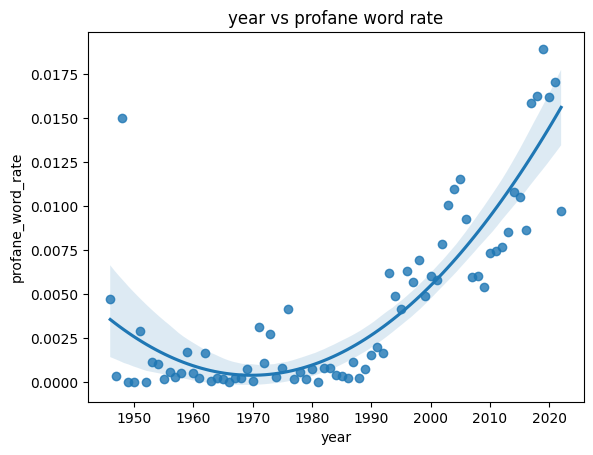

In [ ]:
year_vs_word_type_rate(dfp,'profane')

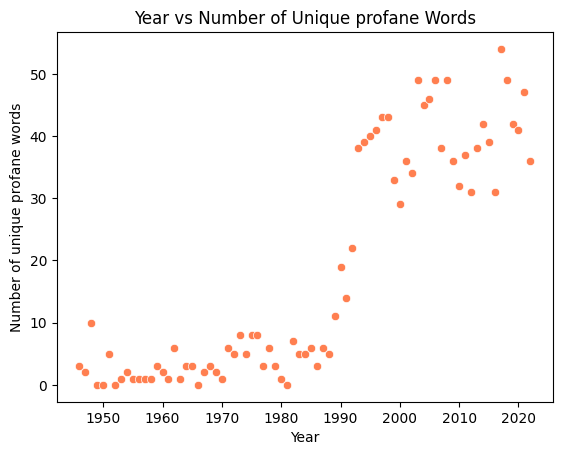

In [ ]:
year_vs_unique_words_of_type(dfp,'profane')

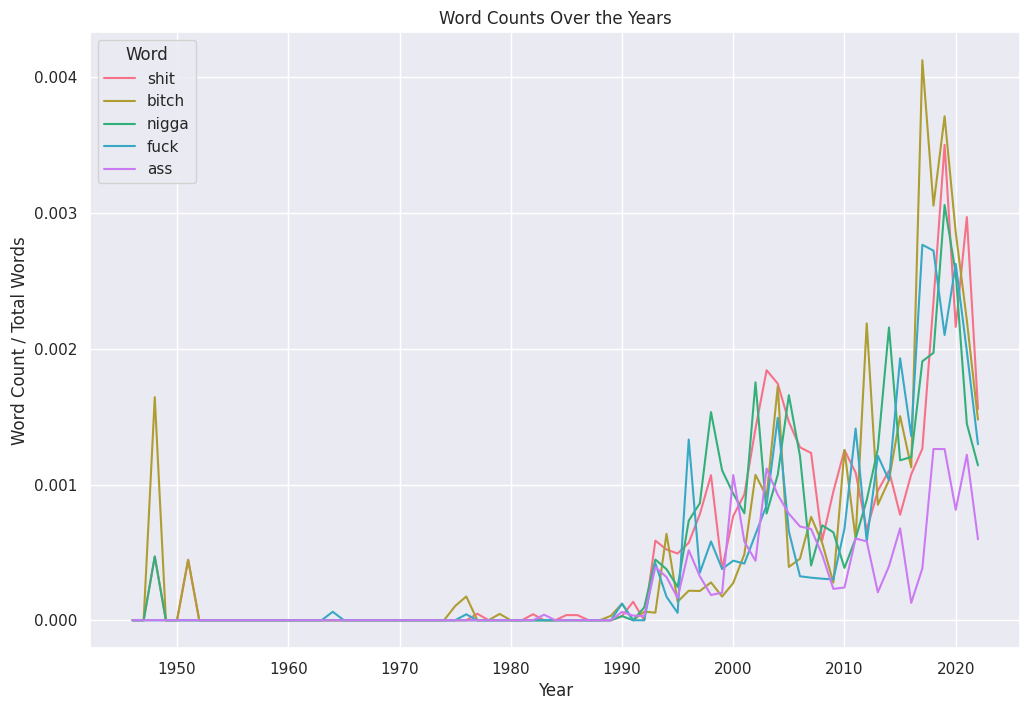

In [ ]:
#import warnings


# Suppress PerformanceWarning
#warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

# Your code here that triggers the warning

#profane words
words_by_year = get_list_of_word_counts_by_year(profane_words)
df=get_table_with_years_and_word_count_for_each_list_word(words_by_year,profane_words)
rates=get_rates_dataframe(df,df_gen)
make_plot(df, rates, top_x=5)

# Reset warning filters to default after your code
#warnings.resetwarnings()

In [ ]:
songs_containing_word(lyrics_df,'ho')#.to_csv('/content/drive/MyDrive/musicProfanity (1)/ho_songs.csv', index=False) #Uncomment to save this as a csv

,Song,Artist Names,Hot100 Ranking Year,Hot100 Rank,Lyrics
19,You're A Big Girl Now,['the stylistics'],1946,19,"[youre, a, big, girl, now, no, more, daddys, l..."
49,Stand Up and Shout About Love,['larry graham'],1947,8,"[having, you, here, in, my, life, makes, up, f..."
121,Woody Woodpecker - Remastered 2005,"['mel blanc', 'the sportsmen']",1948,30,"[hohoho, ho, ho, hohoho, ho, ho, oh, thats, th..."
206,"My Truly, Truly Fair (with Mitch Miller & His ...","['guy mitchell', 'mitch miller his orchestra c...",1951,20,"[oh, ho, truly, truly, fair, truly, truly, fai..."
488,Mack the Knife,['bobby darin'],1959,2,"[oh, the, shark, babe, has, such, teeth, dear,..."
...,...,...,...,...,...
6745,Streets,['doja cat'],2021,67,"[ive, been, going, through, some, things, oh, ..."
6750,late at night,['roddy ricch'],2021,72,"[late, at, night, kiss, me, in, the, mornin, l..."
6775,Throat Baby (Go Baby) (with DaBaby & City Girl...,"['brs kash', 'dababy', 'city girls']",2021,97,"[whats, hannin, chi, chi, sexy, lil, bitch, se..."
6825,Vegas (From the Original Motion Picture Soundt...,['doja cat'],2022,47,"[yeah, ah, get, it, yeah, ah, get, it, yeah, y..."


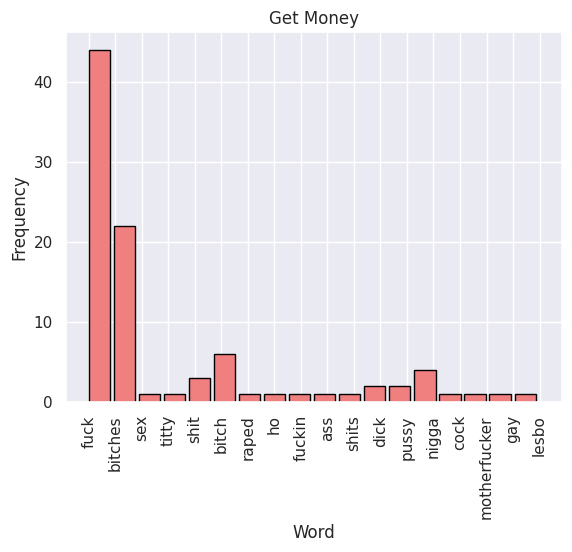

In [ ]:
get_word_count_breakdown_for_song(sorted_df,1,profane_words)

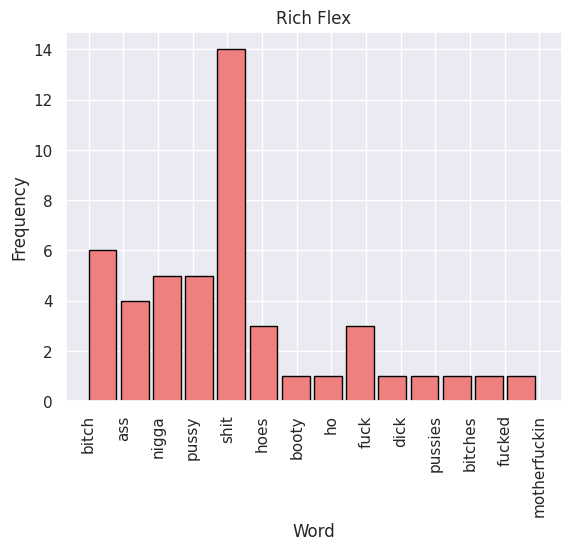

In [ ]:
get_word_count_breakdown_for_song(sorted_df,2,profane_words)

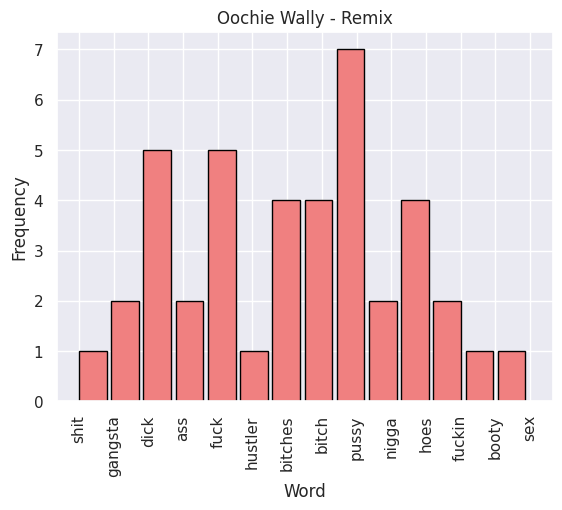

In [ ]:
get_word_count_breakdown_for_song(sorted_df,3,profane_words)